DS 3000

# Team 39: Predicting Trending Fashion Videos through TikTok

1. (.5%) Expresses the central motivation of the project in one or two sentences. This may evolve a bit through the project.

2. (1%) Gives a summary of the data processing pipeline so a technical expert can easily follow along

3. (4%) Obtains, cleans, and merges all data sources involved in the project

4. (2.5%) Builds two visualizations (graphs) from the data which characterize the distribution of the data itself in some interesting way. Your visualizations will be graded based on how much information they can effectively communicate with readers. Please make sure your visualizations are sufficiently distinct from each other.

5. (2%) Discuss what ML tools will be used and the relevant assumptions required to apply each. Either:
    - discuss why one algorithm may be chosen over the others

    - describe what subset of a whole suite of similar algorithms you’ll apply (its ok to say, ‘we’re going to try all of these because we don’t have reason to think one should be better than another’)

## Central Motivation

This work will obtain data from TikTok via web scraping using information from [this video](https://www.youtube.com/watch?v=7AAwtCR7f4w) and [this site](https://stevesie.com/apps/tiktok-api) to predict what features determine whether fashion(using videos under #fashiontrends) videos become popular or not. A possible usage for this project would be for fashion companies interested in marketing on TikTok to grasp what kinds of features are associated with video popularity. 

## Data Processing Pipeline

### Extraction
Extracting data from TikTok's main page without signing into an account proved to be insufficient as there were no "unpopular" videos featured. In order to extract videos we deemed as "unpopular" without adding in user bias, we decided to search for videos under a single hashtag (#fashiontrends). This method provides videos with a wide range of popularity regardless of whose account the search is under. 

After scrolling through a sufficient number of TikTok videos, we downloaded the .har file from the network tab. Using the site mentioned above, we exported the data as a json file before loading into python as a dataframe for cleanup. 

### Transformation
The resulting dataframe contained the `statusCode`, `itemList`, `cursor`, and `hasMore`, where each `itemList` contained over 100 attributes for a single video. Each video was cleaned by collecting the following features: 

- vidId
- caption
- hashtags
- duration
- authorId
- uniqueId
- verified
- privateAccount
- musicId
- musicTitle
- likeCount
- shareCount
- commentCount
- playCount
- followingCount
- followerCount
- videoCount
- isAd

### Loading
The clean data is stored in a newly initialized dataframe `df_tiktok` for analysis. 

## Data

In [14]:
# Extraction
import pandas as pd

df = pd.read_json('tiktok_data.json')
df.head()

,statusCode,itemList,cursor,hasMore
0,0,"{'id': '7004421700007841030', 'desc': 'Septemb...",1860,True
1,0,"{'id': '7058583535610809605', 'desc': 'je fais...",1860,True
2,0,"{'id': '6988932280295230725', 'desc': 'trends ...",1860,True
3,0,"{'id': '6993764316159741190', 'desc': 'gimme g...",1860,True
4,0,"{'id': '6977481930044493061', 'desc': 'Reply t...",1860,True


In [15]:
# Transformation and Loading

# list of trending videos 
trending_videos = df['itemList']

# initialize dataframe
df_tiktok = pd.DataFrame()

for vid_idx in range(1799): 
    vid = trending_videos[vid_idx]
    s_tiktok = pd.Series()
    
    # unique video id
    s_tiktok['vidId'] = [vid['id']][0]
    
    # video caption
    s_tiktok['caption'] = [vid['desc']][0]
     
    # video hashtags
    # if the video has hashtags
    if 'textExtra' in vid.keys():
        # initialize list to store hashtags
        hashtag_list = []
        for idx in range(len(vid['textExtra'])):
            hashtag = vid['textExtra'][idx]['hashtagName']
            # if hashtag is not empty string
            if hashtag != '':
                hashtag_list.append(hashtag)
        # store hashtags into dataframe
        s_tiktok['hashtag'] = hashtag_list
    
    # video duration in seconds
    s_tiktok['duration (s)'] = [vid['video']['duration']][0]
    
    # creator id, username, verification status, private account
    s_tiktok['authorId'] = vid['author']['id']
    s_tiktok['uniqueId'] = vid['author']['uniqueId']
    s_tiktok['verified'] = vid['author']['verified']
    s_tiktok['privateAccount'] = vid['author']['privateAccount']
    
    # music id, music title
    s_tiktok['musicId'] = vid['music']['id']
    s_tiktok['musicTitle'] = vid['music']['title']
    
    # like, share, comment, play
    s_tiktok['likeCount'] = vid['stats']['diggCount']
    s_tiktok['shareCount'] = vid['stats']['shareCount']
    s_tiktok['commentCount'] = vid['stats']['commentCount']
    s_tiktok['playCount'] = vid['stats']['playCount']
    
    # creator following, follower, number of posts
    s_tiktok['followingCount'] = vid['authorStats']['followingCount']
    s_tiktok['followerCount'] = vid['authorStats']['followerCount']
    s_tiktok['videoCount'] = vid['authorStats']['videoCount']
    
    # is this video an ad
    s_tiktok['isAd'] = vid['isAd']
    
    df_tiktok = df_tiktok.append(s_tiktok, ignore_index = True)
    
# some features that are false are showing as 0.0, and true as 1.0
# make everything uniform -- only showing as True or False
df_tiktok['verified']= df_tiktok['verified'].apply(lambda x: True if x == 1.0 else x)
df_tiktok['privateAccount']= df_tiktok['privateAccount'].apply(lambda x: False if x == 0.0 else x)
df_tiktok['isAd']= df_tiktok['isAd'].apply(lambda x: False if x == 0.0 else x)

/var/folders/32/7qdb8w1s2cb6lpfrxfk_p10w0000gn/T/ipykernel_4149/180972706.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s_tiktok = pd.Series()


In [16]:
df_tiktok.head()

,vidId,caption,hashtag,duration (s),authorId,uniqueId,verified,privateAccount,musicId,musicTitle,likeCount,shareCount,commentCount,playCount,followingCount,followerCount,videoCount,isAd
0,7004421700007841030,September must have!!! PART 1🤎 #fashionhacks #...,"[fashionhacks, fashiontrends]",31.0,6563206248362999813,_emmaaasss,0.0,False,6709415906423867393,Sex and the City (Main Theme),12200.0,24.0,38.0,68300.0,831.0,222600.0,858.0,False
1,7058583535610809605,je fais quelle couleur ensuite guys ? 💖😘 @clai...,"[@clairelatour, tiktokfashion, mode, conseilsm...",14.0,6647813383222394885,clairelatour,False,False,6863118485925398530,Baby Work It,6123.0,9.0,60.0,57100.0,403.0,391600.0,896.0,False
2,6988932280295230725,trends to invest in…because they’ll be here fo...,"[fashiontrends, fashiontrends2021, 2022fashion...",10.0,6714077600156828678,rachelnoelleclark,False,False,6979312907339254533,son original,6032.0,116.0,16.0,59700.0,225.0,202600.0,603.0,False
3,6993764316159741190,gimme gogo boots and opera gloves I’ll be a ha...,"[falltrends2021, fashiontrends2021, fashiontre...",46.0,6914500399362458630,taylortiminskas,False,False,6789995456064669697,Juless Edits,6026.0,53.0,36.0,39100.0,38.0,163100.0,478.0,False
4,6977481930044493061,Reply to @itsveronicaustin Club Kid fashion de...,"[clubkid, fashiontrends, trendcycle, fashioncy...",27.0,6817993576023983109,oldloserinbrooklyn,True,False,96226181,Vogue,6001.0,66.0,62.0,36300.0,552.0,327900.0,431.0,False


In [17]:
df_tiktok.describe()

,duration (s),likeCount,shareCount,commentCount,playCount,followingCount,followerCount,videoCount
count,1799.000000,1.799000e+03,1799.000000,1799.000000,1.799000e+03,1799.00000,1.799000e+03,1799.000000
mean,25.156754,3.965432e+04,350.897721,258.673152,3.604996e+05,366.39522,2.848439e+05,504.544747
std,21.297195,1.333296e+05,1198.090292,755.919067,2.473083e+06,580.08641,7.800993e+05,670.897185
min,0.000000,1.666000e+03,1.000000,0.000000,4.505000e+03,0.00000,1.600000e+01,3.000000
25%,11.000000,4.083500e+03,20.000000,30.000000,3.905000e+04,68.00000,2.485000e+04,151.000000
50%,15.000000,8.569000e+03,59.000000,66.000000,8.450000e+04,216.00000,1.115000e+05,399.000000
75%,34.000000,2.595000e+04,206.000000,182.000000,2.367000e+05,485.00000,3.006000e+05,660.000000
max,180.000000,4.000000e+06,22800.000000,14900.000000,1.003000e+08,7511.00000,1.520000e+07,6851.000000


In [57]:
hashtags_list_df = pd.DataFrame()
hashtags_list_df = hashtags_list_df.append(df_tiktok['hashtag'])
hashtags_list_df = hashtags_list_df.transpose()
hashtags_list_df

,hashtag
0,"[fashionhacks, fashiontrends]"
1,"[@clairelatour, tiktokfashion, mode, conseilsm..."
2,"[fashiontrends, fashiontrends2021, 2022fashion..."
3,"[falltrends2021, fashiontrends2021, fashiontre..."
4,"[clubkid, fashiontrends, trendcycle, fashioncy..."
...,...
1794,"[asianfashion, streetstyle, fashiontrends, cut..."
1795,"[pintrestfashion, outfitideas, pintrest, style..."
1796,"[foryoupage, foryou, fashiontrends, veryblackf..."
1797,"[fashion, 2022trends, fashiontrends, pradainte..."


In [61]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df['hashtag']
    for hashtag in hashtags_list],
    columns=['hashtag'])

flattened_hashtags_df

,hashtag
0,fashionhacks
1,fashiontrends
2,@clairelatour
3,tiktokfashion
4,mode
...,...
12846,ootd
12847,foryoupage
12848,mystyle
12849,fyp


In [62]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

2942

In [127]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

popular_hashtags

,hashtag,counts
0,fashiontrends,1804
1,fashion,564
2,fyp,484
3,style,234
4,fashiontiktok,216
...,...,...
2937,highwaisted,1
2938,highwaistedjeans,1
2939,hijabi,1
2940,hijabstyle,1


/Users/anjalitanna/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


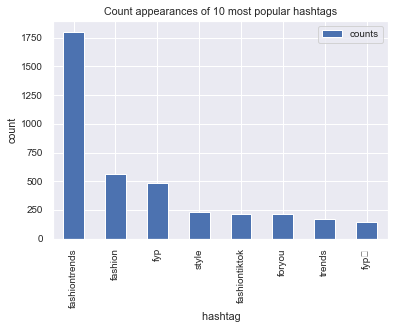

In [128]:
#plotting popular hashtags
popular_hashtags.head(8).plot(kind = 'bar', x ='hashtag', y = 'counts')
plt.xlabel(' hashtag')
plt.ylabel('count')
plt.title('Count appearances of 10 most popular hashtags')
plt.show()

In [132]:
# dropping #fashiontrends hashtag
popular_hashtags.drop(index=popular_hashtags.index[0], 
        axis=0, 
        inplace=True)

In [133]:
# popular hashtags without #fashiontrends (since all videos have them)
popular_hashtags.head()

,hashtag,counts
2,fyp,484
3,style,234
4,fashiontiktok,216
5,foryou,212
6,trends,173


In [134]:
# take hashtags which appear at least this amount of times
min_appearance = 100
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [140]:
no_fashiontrends_hashtag

In [136]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df['hashtag'].apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [137]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]


for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [138]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

/Users/anjalitanna/opt/miniconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/Users/anjalitanna/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


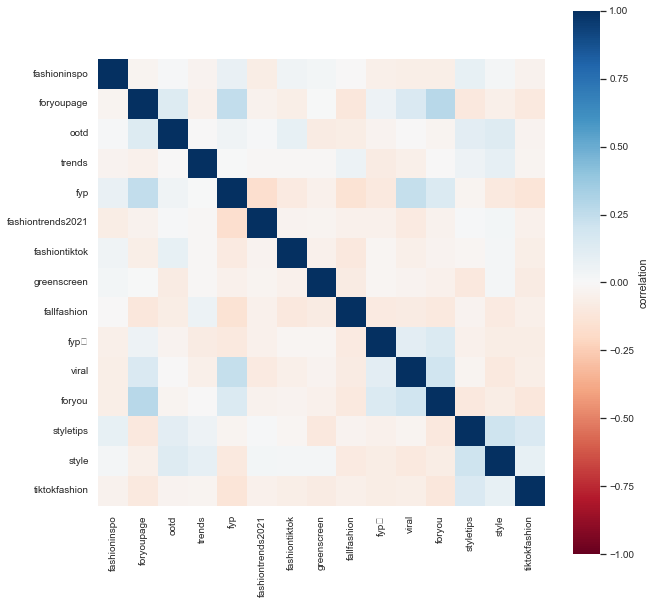

In [139]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
sns.set(font_scale=0.9)
plt.figure(figsize=(10, 10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

## Visualizations

- correlation matrix?
- duration, likes, views, shares, comments, follower count pairplot?

## Machine Learning

- regression
    - random forest regression
    - cluster?
    - feature importance
    
- not classifier because popular would be better predicted continuously rather than in discrete categories